In [40]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [46]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
X.shape, y.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
from sklearn import linear_model
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
clf.fit(X=X_train, y=y_train)
clf.coef_, clf.coef_.shape, clf.intercept_
coef_sgd_alogo=clf.coef_

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.08 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.09 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

In [42]:
X.shape, y.shape

((50000, 15), (50000,))

In [43]:
from math import exp
import numpy as np
from tqdm import tqdm
import math 

def Sum_Error(x_train):
    Sum_Error=0
    for i in range(len(X_train)):
        yhat=predict1(train[i], coef,intcpt)
        error=(y_train[i] - yhat)
        Sum_error=Sum_error +(error*error)

# Make a prediction with coefficients
def predict(row, coefficients,intcpt):
    yhat = intcpt
    for i in range(len(row)):
        yhat += coefficients[i] * row[i]
    if yhat < 0:
        value=1 - 1 / (1 + math.exp(yhat))
    else:
        value=1 / (1 + math.exp(-yhat))  
    if value>=0.5:
        return 1
    else:
        return 0
    
def coefficients_sgd(x_train,y_train):
    coef = [0.0 for i in range(len(x_train[0]))]
    intcpt=0
    #coef = np.random.normal(0, 0.1, size=(len(x_train[0])))
    #intcpt=np.random.normal(0,0.1)
    alpha=0.0001
    lamda=0.0001
    N=15
    n_epoch=125
    ERROR=[]
    for epoch in tqdm(range(n_epoch)):
        sum_err=0
        for i in range(len(x_train)):
            #print(coef)
            yhat = predict(x_train[i], coef,intcpt)
            error = y_train[i] - yhat
            sum_err += error**2
            for j in range(len(coef)):
                coef[j]= ((1-(alpha*lamda/N))*coef[j])+(alpha*x_train[i][j]*error)
                intcpt=((1-(alpha*lamda/N))*intcpt+alpha*error)
            #print(coef)
        if epoch==10:
            print(epoch,":",sum_err)
        ERROR.append(sum_err)
        #print(epoch,":",sum_err)
    print(ERROR) 
    
    return coef,ERROR



In [44]:
coef_train,ERROR_train = coefficients_sgd(X_train,y_train)
coef_test,ERROR_test = coefficients_sgd(X_test,y_test)


  8%|██████▍                                                                          | 10/125 [00:25<04:48,  2.51s/it]

10 : 8819



 62%|██████████████████████████████████████████████████▌                              | 78/125 [03:15<01:56,  2.48s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [05:12<00:00,  2.49s/it]

[8900, 8857, 8818, 8862, 8913, 8863, 8859, 8875, 8776, 8879, 8819, 8859, 8843, 8918, 8840, 8832, 8896, 8878, 8869, 8897, 8826, 8814, 8829, 8845, 8878, 8881, 8881, 8869, 8934, 8803, 8966, 8886, 8822, 8853, 8928, 8799, 8859, 8925, 8829, 8809, 8828, 8893, 8847, 8749, 8802, 8823, 8801, 8868, 8762, 8801, 8908, 8792, 8873, 8916, 8840, 8833, 8803, 8820, 8855, 8890, 8830, 8924, 8833, 8866, 8855, 8842, 8815, 8881, 8816, 8816, 8912, 8889, 8884, 8884, 8848, 8869, 8904, 8824, 8805, 8909, 8837, 8829, 8881, 8888, 8862, 8877, 8873, 8884, 8897, 8833, 8908, 8836, 8861, 8910, 8849, 8819, 8867, 8906, 8889, 8887, 8887, 8873, 8842, 8890, 8873, 8827, 8824, 8898, 8829, 8872, 8839, 8883, 8792, 8825, 8918, 8831, 8827, 8871, 8870, 8930, 8816, 8848, 8871, 8794, 8859]



  8%|██████▍                                                                          | 10/125 [00:08<01:36,  1.19it/s]

10 : 2934



 62%|██████████████████████████████████████████████████▌                              | 78/125 [01:07<00:40,  1.17it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [01:46<00:00,  1.20it/s]

[2951, 2940, 3000, 2899, 2957, 2958, 2989, 2959, 2971, 2965, 2934, 2965, 2942, 2955, 2926, 2940, 2991, 2957, 2955, 2923, 2966, 2953, 2959, 2945, 2965, 2971, 2984, 2962, 2931, 2955, 2946, 2930, 2957, 2952, 2945, 2942, 2900, 2967, 2934, 2966, 2956, 2992, 2968, 2925, 2963, 2960, 2952, 2966, 2934, 2922, 2956, 2956, 2885, 2958, 2994, 2957, 2964, 2917, 2963, 2944, 2931, 2951, 2953, 2966, 2968, 2988, 2928, 2943, 2977, 2919, 2953, 2944, 2928, 2954, 2960, 2957, 2905, 2950, 2974, 2934, 2984, 2947, 2967, 2937, 2962, 2968, 2963, 2918, 2912, 2953, 2940, 2987, 2926, 2974, 2974, 2952, 2932, 2973, 2984, 2968, 2947, 2919, 2982, 2974, 2986, 2959, 2974, 2956, 2906, 2905, 2910, 2949, 2951, 2944, 2916, 2974, 2946, 2941, 2979, 2970, 2956, 2981, 2945, 2948, 2973]


In [47]:
print(coef_sgd_algo)
print(coef_train)
print(coef_test)

[[-0.42336692  0.18547565 -0.14859036  0.34144407 -0.2081867   0.56016579
  -0.45242483 -0.09408813  0.2092732   0.18084126  0.19705191  0.00421916
  -0.0796037   0.33852802  0.02266721]]


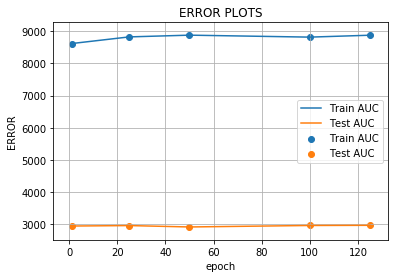

In [45]:
import matplotlib.pyplot as plt
error_train=[]
error_train.append(ERROR[0])
error_train.append(ERROR[24])
error_train.append(ERROR[49])
error_train.append(ERROR[99])
error_train.append(ERROR[124])

error_test=[]
error_test.append(ERROR_test[0])
error_test.append(ERROR_test[24])
error_test.append(ERROR_test[49])
error_test.append(ERROR_test[99])
error_test.append(ERROR_test[124])


epoch=[1,25,50,100,125]
plt.plot(epoch,error_train, label='Train AUC')
plt.plot(epoch,error_test, label='Test AUC')

plt.scatter(epoch,error_train, label='Train AUC')
plt.scatter(epoch,error_test, label='Test AUC')

plt.legend()
plt.xlabel("epoch")
plt.ylabel("ERROR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()